In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

In [17]:
df = pd.read_csv("Customer_Data.csv")
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('CustomerID', axis=1)
df.head()

,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,310,1,196,294.40,294.400000,16,0.000000,2,16,0


In [18]:
df.head()

,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,310,1,196,294.40,294.400000,16,0.000000,2,16,0


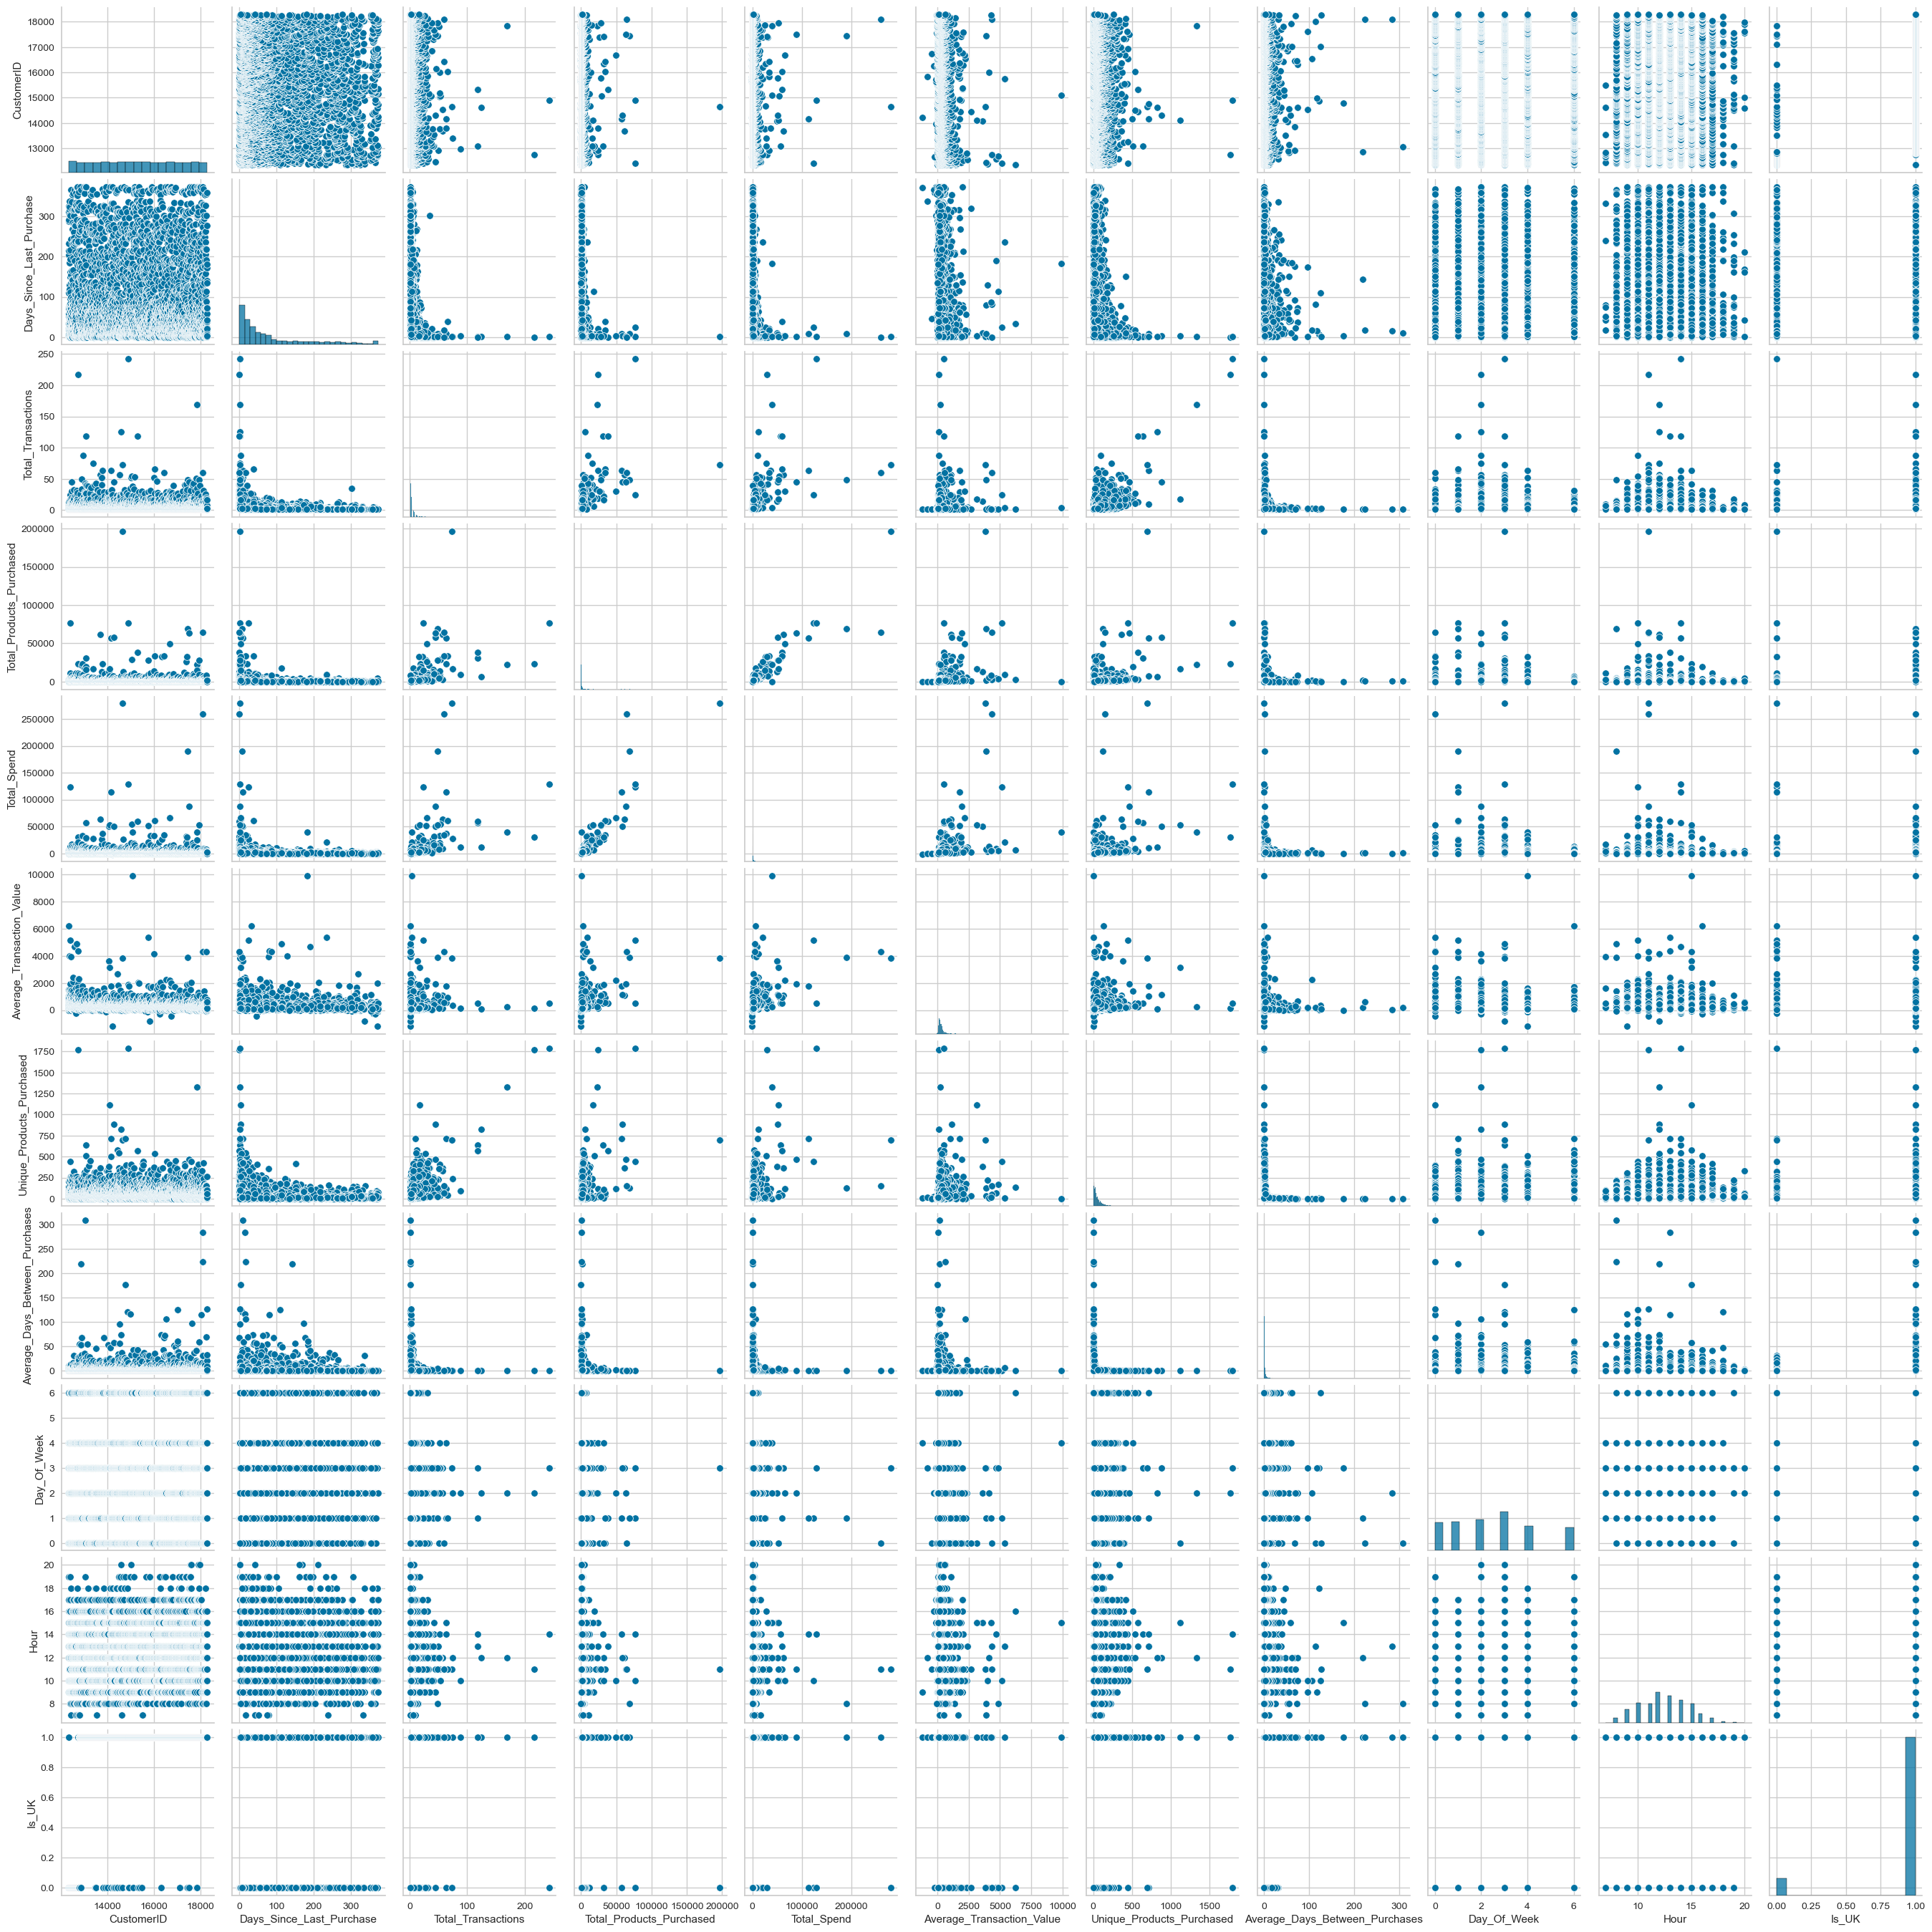

In [4]:
#Data Distribution

sns.pairplot(df)
plt.show()

In [16]:
scaled_df = StandardScaler().fit_transform(df) #scaling the dataframe


TypeError: scatter() missing 1 required positional argument: 'y'

## Elbow Method

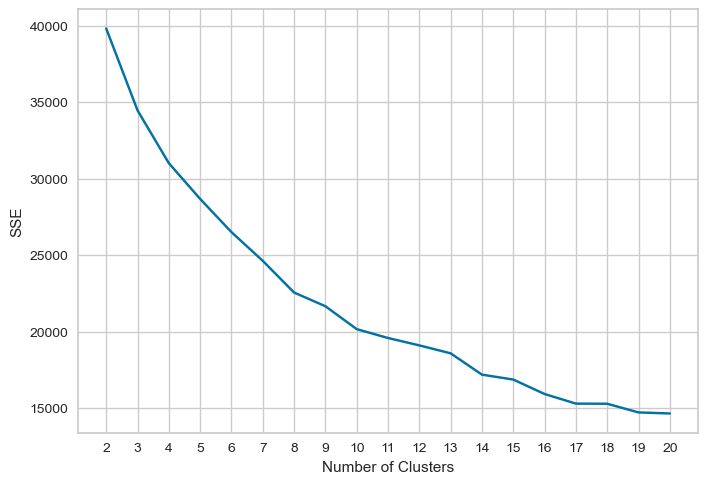

In [7]:
#kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}


sse = [] #sum of squared error list
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 21), sse)
plt.xticks(range(2, 21))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

#### It is observed that there is no strong bend in the range of 1 to 10. However, 8 seems to be the most distinct bend out of all of the bends.

### Alternate Library for elbow method

In [11]:
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(1,1), metric='calinski_harabasz', timings=False
)
visualizer.fit(scaled_df)        # Fit the data to the visualizer
visualizer.show()        

ValueError: cannot reshape array of size 0 into shape (0,newaxis)

In [16]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=8, n_init=10, random_state=1)
kmeans.fit(scaled_df)

KMeans(init='random', n_init=10, random_state=1)